In [2]:
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import scipy.sparse
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight

In [3]:
zebrafish = "../Data/danio_training_set.h5ad"

In [4]:
adata = sc.read_h5ad(zebrafish)

In [5]:
adata

AnnData object with n_obs × n_vars = 43223 × 36250
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.ribo', 'nCount_MS', 'nFeature_MS', 'MS_class_SNR', 'MS_class_Seurat', 'method', 'sample', 'hpf', 'hpf.nice', 'stage.group', 'subset.full', 'subset', 'cluster', 'tissue', 'identity.super', 'identity.sub', 'identity.super.short', 'identity.sub.short', 'zfin'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'identity.super.short_colors', 'identity.super_colors', 'tissue_colors'
    obsm: 'X_umap'

In [49]:
adata.obs

,nCount_RNA,nFeature_RNA,percent.mt,percent.ribo,nCount_MS,nFeature_MS,MS_class_SNR,MS_class_Seurat,method,sample,...,subset.full,subset,cluster,tissue,identity.super,identity.sub,identity.super.short,identity.sub.short,zfin,identity.super_numeric
TC1-24-AAACCCAGTATGGAGC,3728.0,984,0.348712,38.090129,NaN,-2147483648,NA,NA,10X,TC1-24,...,mesenchyme,mese,mese.10,mesenchyme,pharyngeal arch,intermediate (incl. jaw joint),pharyngeal arch,intermediate (incl. jaw joint),,0
TC1-24-AAACGAAAGCGGGTAT,9892.0,2166,0.849171,26.496159,NaN,-2147483648,NA,NA,10X,TC1-24,...,glial,glia,glia.20,glial,oligodendrocytes,"spinal cord, precursors",oligodendrocytes,"spinal cord, precursors","ZFA:0009076,ZFA:0000075",1
TC1-24-AAACGCTAGCTTAGTC,7182.0,1459,0.111390,40.740741,NaN,-2147483648,NA,NA,10X,TC1-24,...,neural,neur,neur.2,neural,progenitors,"unknown, incl. some retina",progenitors,"unknown, incl. some retina",,2
TC1-24-AAACGCTCAGAATGTA,3400.0,941,0.058824,40.235294,NaN,-2147483648,NA,NA,10X,TC1-24,...,mesenchyme,mese,mese.12,mesenchyme,pharyngeal arch,progenitors,pharyngeal arch,progenitors,,0
TC1-24-AAACGCTCAGCTACTA,5777.0,1173,0.034620,45.577289,NaN,-2147483648,NA,NA,10X,TC1-24,...,endoderm,endo,endo.9,gut,intestine,"progenitors, early + absorptive",intestine,"progenitors, early + absorptive",,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TC4-36-L-TTTGGTTTCACGACTA,9193.0,2248,1.490264,37.648211,1383.0,10,Bar4,Bar4,10X,TC4-36-L,...,glial,glia,glia.6,spinal cord,motor neurons,primary motor neurons (olig2+),motor neurons,primary motor neurons (olig2+),"ZFA:0000075,ZFA:0009052,ZFA:0009244",32
TC4-36-L-TTTGTTGAGCGTCAGA,3088.0,1381,1.101036,18.037565,2237.0,9,Bar7,Bar7,10X,TC4-36-L,...,neural,neur,neur.28,neural,hindbrain,"rhombomere 7-8, [glycinergic]",hindbrain,"rhombomere 7-8, [glycinergic]",,5
TC4-36-L-TTTGTTGAGTATGCAA,4528.0,1563,1.082155,29.196113,2416.0,10,Bar3,Bar3,10X,TC4-36-L,...,eye,eye,eye.14,eye,photoreceptors,precursors,photoreceptors,precursors,ZFA:0009154,65
TC4-36-L-TTTGTTGTCCGCATAA,8318.0,2492,1.562876,24.356817,2920.0,10,Bar3,Bar3,10X,TC4-36-L,...,neural,neur,neur.41,neural,Purkinje neurons,gabaergic (gad2+),Purkinje neurons,gabaergic (gad2+),,59


In [7]:
print(adata.obs['sample'].value_counts())
print()
print('X matrix is sparse:', scipy.sparse.issparse(adata.X))
print('X size =', adata.X.shape)

sample
TC4-36-H    15131
TC4-24-H    11998
TC4-36-L     4781
TC4-24-L     4510
TC2-36       4433
TC1-24       2370
Name: count, dtype: int64

X matrix is sparse: True
X size = (43223, 36250)


In [8]:
adata.obs["identity.super"].unique() #Going off with this as cell names

['pharyngeal arch', 'oligodendrocytes', 'progenitors', 'intestine', 'telencephalon', ..., 'preoptic area', 'medial fin mesenchyme', 'retinal bipolar cells', 'mural cell', 'cerebellum']
Length: 95
Categories (95, object): ['Kolmer-Agduhr / CSF-contacting neurons', 'Purkinje neurons', 'adaxial cells', 'adenohypophysis', ..., 'vasculature', 'ventral forebrain', 'xanthoblasts', 'xanthophores']

In [10]:
cell_types = adata.obs["identity.super"].unique()

replacement_dict = {cell: i for i, cell in enumerate(cell_types)}

adata.obs["identity.super_numeric"] = adata.obs["identity.super"].map(replacement_dict)

replacement_dict

{'pharyngeal arch': 0,
 'oligodendrocytes': 1,
 'progenitors': 2,
 'intestine': 3,
 'telencephalon': 4,
 'hindbrain': 5,
 'sensory neurons': 6,
 'erythroblasts (primitive)': 7,
 'periderm': 8,
 'iridoblasts': 9,
 'lateral line primordium': 10,
 'cardiac mesenchyme': 11,
 'neurons': 12,
 'midbrain-hindbrain boundary': 13,
 'spinal cord': 14,
 'sclerotome': 15,
 'vasculature': 16,
 'xanthoblasts': 17,
 'diencephalon': 18,
 'heart': 19,
 'retinal progenitors': 20,
 'slow muscle': 21,
 'midbrain': 22,
 'somite': 23,
 'epidermis/placodal ectoderm': 24,
 'Kolmer-Agduhr / CSF-contacting neurons': 25,
 'otic': 26,
 'epidermis': 27,
 'ionocytes': 28,
 'sclerotome/satellite cells': 29,
 'somitic mesoderm': 30,
 'ventral forebrain': 31,
 'motor neurons': 32,
 'floor plate': 33,
 'presomitic/somitic mesoderm': 34,
 'liver': 35,
 'optic primordia': 36,
 'xanthophores': 37,
 'proximal convoluted tubule': 38,
 'fin epidermis': 39,
 'optic cup': 40,
 'placodal ectoderm': 41,
 'neural crest': 42,
 'sat

In [11]:
adata.obs["identity.super_numeric"]

TC1-24-AAACCCAGTATGGAGC       0
TC1-24-AAACGAAAGCGGGTAT       1
TC1-24-AAACGCTAGCTTAGTC       2
TC1-24-AAACGCTCAGAATGTA       0
TC1-24-AAACGCTCAGCTACTA       3
                             ..
TC4-36-L-TTTGGTTTCACGACTA    32
TC4-36-L-TTTGTTGAGCGTCAGA     5
TC4-36-L-TTTGTTGAGTATGCAA    65
TC4-36-L-TTTGTTGTCCGCATAA    59
TC4-36-L-TTTGTTGTCGCGCCAA     5
Name: identity.super_numeric, Length: 43223, dtype: category
Categories (95, int64): [25, 59, 78, 70, ..., 16, 31, 17, 37]

In [12]:
print("Unique values in 'celltype' column after replacement:", adata.obs['identity.super_numeric'].unique())

Unique values in 'celltype' column after replacement: [0, 1, 2, 3, 4, ..., 90, 91, 92, 93, 94]
Length: 95
Categories (95, int64): [25, 59, 78, 70, ..., 16, 31, 17, 37]


In [13]:
cell_type_counts = adata.obs['identity.super'].value_counts()

print("Number of cells in each cell type:")
print(cell_type_counts)

Number of cells in each cell type:
identity.super
hindbrain                8412
spinal cord              2631
progenitors              2292
diencephalon             2007
midbrain                 1915
                         ... 
taste epithelium           14
hemogenic endothelium      14
cardiac muscle             14
adenohypophysis            13
retinal bipolar cells      13
Name: count, Length: 95, dtype: int64


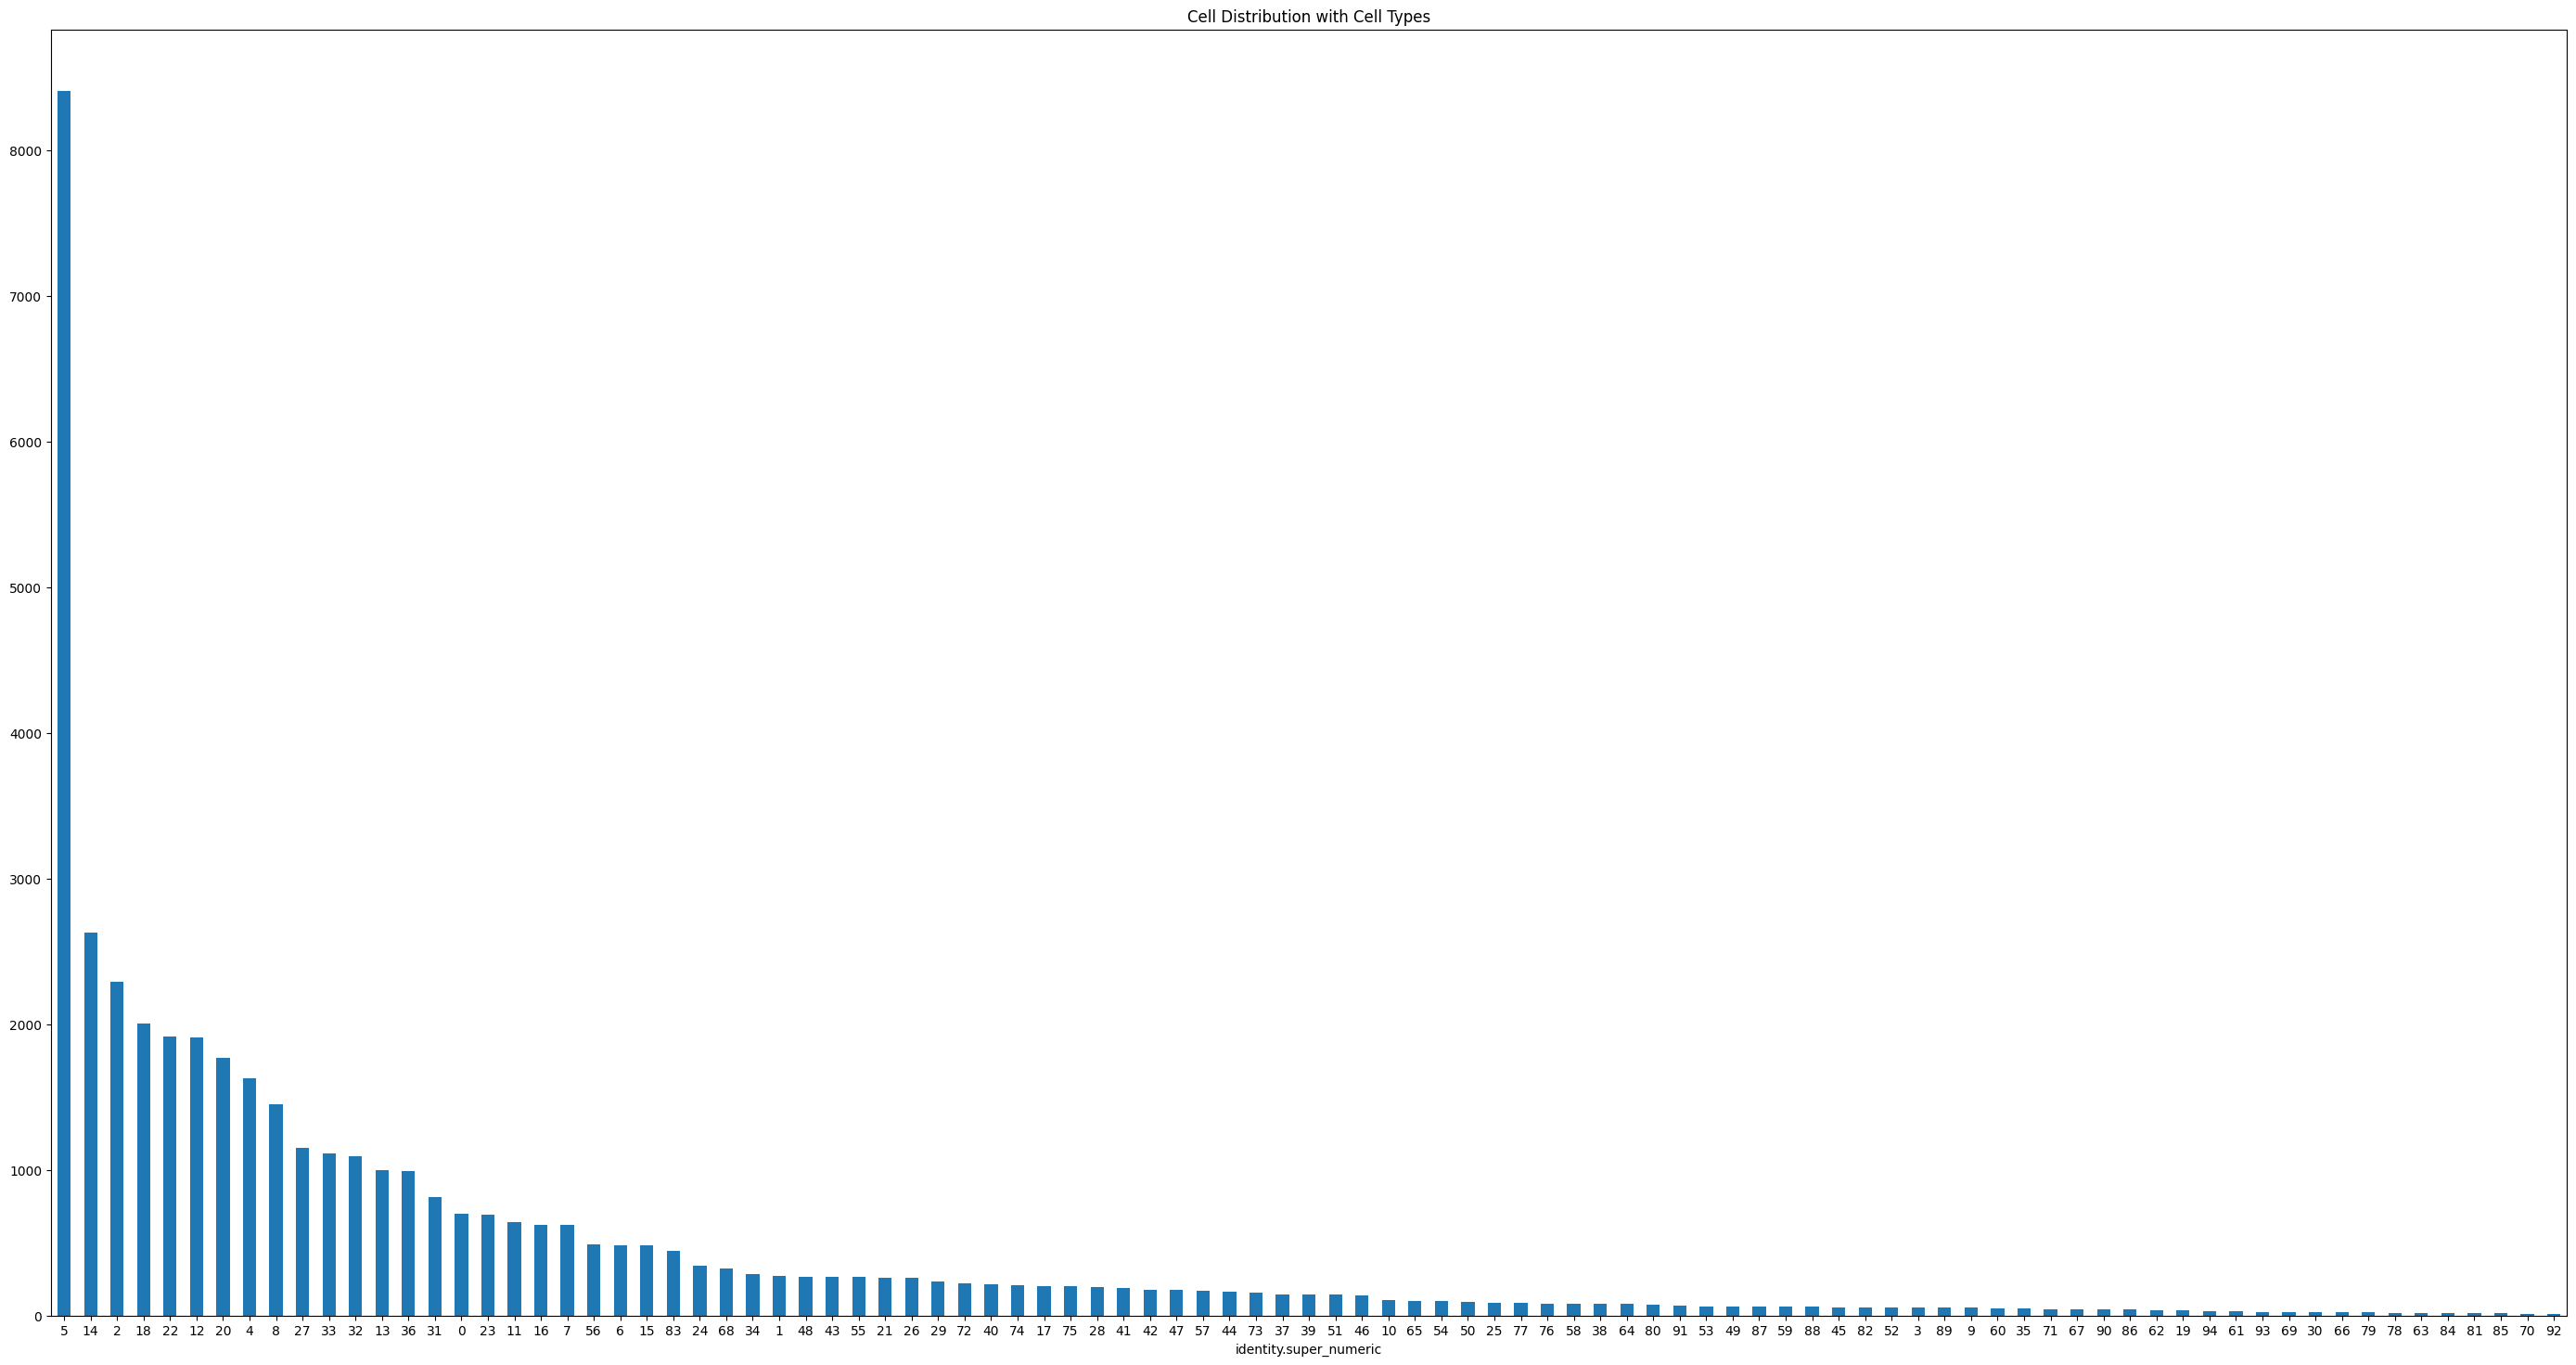

In [14]:
# cell distribution with cell types
y = adata.obs['identity.super_numeric']
plt.figure(figsize=(35, 18))
plt.title('Cell Distribution with Cell Types')
y.value_counts().plot(kind='bar', rot=0)
plt.show()

In [50]:
adata.obs['identity.super_numeric'].values

[0, 1, 2, 0, 3, ..., 32, 5, 65, 59, 5]
Length: 43223
Categories (95, int64): [25, 59, 78, 70, ..., 16, 31, 17, 37]

In [ ]:
if scipy.sparse.issparse(adata.X):
    X = adata.X.toarray()
else:
    X = adata.X
    
y = adata.obs['identity.super_numeric'].values

# random states (completely arbitrary):
# adata.X -> (19, 30)
# adata.obsm["Scanorama"] -> (8, 3)
# adata.obsm["X_pca"] -> (3, 13)
# adata.obsm["X_umap"] -> (34, 90)
# adata_hv.X -> (6, 7)

train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.2, random_state=19)
train_features, val_features, train_labels, val_labels = train_test_split(train_features, train_labels, test_size = 0.25, random_state=30)

train_features = np.array(train_features)
test_features = np.array(test_features)
val_features = np.array(val_features)

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
val_labels = np.array(val_labels)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=train_labels
)

print('Sample weights shape:', sample_weights.shape)

np.save('../Arrays/train_features_zebrafish.npy', train_features)
np.save('../Arrays/test_features_zebrafish.npy', test_features)
np.save('../Arrays/val_features_zebrafish.npy', val_features)
np.save('../Arrays/train_labels_zebrafish.npy', train_labels)
np.save('../Arrays/test_labels_zebrafish.npy', test_labels)
np.save('../Arrays/val_labels_zebrafish.npy', val_labels)
np.save('../Arrays/sample_weights_zebrafish.npy', sample_weights)

Training features shape: (25933, 36250)
Validation features shape: (8645, 36250)
Test features shape: (8645, 36250)
Training labels shape: (25933,)
Validation labels shape: (8645,)
Test labels shape: (8645,)
Sample weights shape: (25933,)
